In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import pickle

## Milan

### Week 1

In [2]:
week = 1
city = 'mi'
max_id = 10000
data = pd.read_csv(f'../data/{city}_to_{city}/{city}_to_{city}_week{week}.csv')
print(data.shape)
data.head()

(76921477, 3)


,square_id1,square_id2,strength
0,1,1,0.100214
1,1,2,0.102496
2,1,3,0.104924
3,1,4,0.093607
4,1,5,0.086226


In [3]:
with open(f'hotspots_{city}.pkl', 'rb') as file:
    hotspots = pickle.load(file)

#### Degree Centrality Uncleaned

In [4]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data[(data.square_id1 == hp) &  
                                    (~(data.square_id2 == hp))].strength.sum())

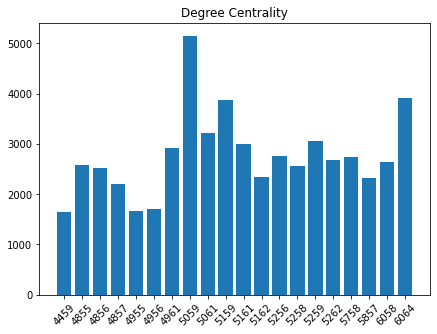

In [5]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities)
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}_uncleaned.png')

#### Cleaning Data

In [6]:
data_cleaned = data[(data.square_id1.isin(hotspots)) & 
                    (data.square_id2.isin(hotspots))]
print(data_cleaned.shape)
data_cleaned.head()

(400, 3)


,square_id1,square_id2,strength
34871181,4459,4459,132.164749
34871500,4459,4855,3.541178
34871501,4459,4856,3.915375
34871502,4459,4857,4.128006
34871589,4459,4955,2.349062


#### Degree Centrality Clean

In [7]:
degree_centralities = list()
for hp in hotspots:
    degree_centralities.append(data_cleaned[(data_cleaned.square_id1 == hp) &  
                                            (~(data_cleaned.square_id2 == hp))].strength.sum())

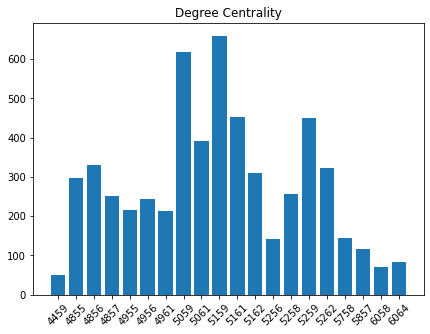

In [8]:
plt.figure(figsize=(7,5))
plt.title('Degree Centrality')
plt.bar(range(len(degree_centralities)), degree_centralities)
plt.xticks(range(len(degree_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/degree_centrality_{city}_week{week}.png')

#### Building Graph

In [9]:
G = nx.DiGraph()

In [10]:
for row in data_cleaned.values:
    G.add_edge(row[0], row[1], strength=row[2])

#### Closeness Centrality

In [16]:
closeness_centralities = list()
for hp in hotspots:
    cc = nx.closeness_centrality(G, hp, distance='strength') / 19
    closeness_centralities.append(cc)

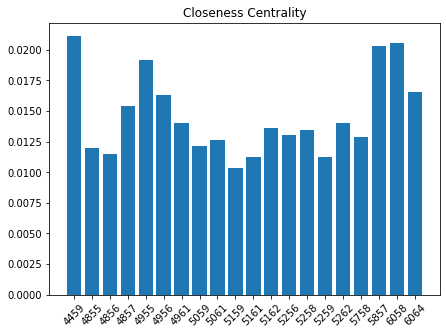

In [17]:
plt.figure(figsize=(7,5))
plt.title('Closeness Centrality')
plt.bar(range(len(closeness_centralities)), closeness_centralities)
plt.xticks(range(len(closeness_centralities)), hotspots, rotation=45)
plt.savefig(f'../plots/closeness_centrality_{city}_week{week}.png')

#### Betweenness Centrality

In [26]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=False, weight='strength')

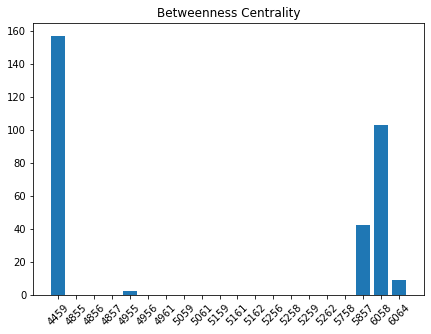

In [31]:
plt.figure(figsize=(7,5))
plt.title('Betweenness Centrality')
plt.bar(range(len(betweenness_centrality)), betweenness_centrality.values())
plt.xticks(range(len(betweenness_centrality)), [int(x) for x in betweenness_centrality.keys()], rotation=45)
plt.savefig(f'../plots/betweenness_centrality_{city}_week{week}.png')

#### PageRank Centrality

In [40]:
pagerank_centrality = nx.pagerank(G, weight='strength')
pagerank_centrality

{4459.0: 0.03134381623458477,
 4855.0: 0.04701727060554396,
 4856.0: 0.048834637468949456,
 4857.0: 0.04077941777478249,
 4955.0: 0.03447250136798406,
 4956.0: 0.038602578994271025,
 4961.0: 0.03064805591623941,
 5059.0: 0.0806181375713497,
 5061.0: 0.048967991009215735,
 5159.0: 0.08317851112666542,
 5161.0: 0.06788509973164339,
 5162.0: 0.042975195666899745,
 5256.0: 0.041738062565519624,
 5258.0: 0.043964521579032106,
 5259.0: 0.08782563388524474,
 5262.0: 0.05215076697413433,
 5758.0: 0.03867205131981789,
 5857.0: 0.03256045554338031,
 6058.0: 0.056988086937723496,
 6064.0: 0.05077720772701839}

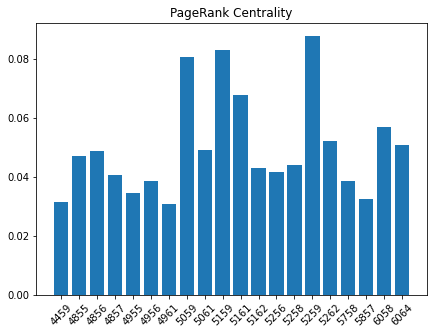

In [41]:
plt.figure(figsize=(7,5))
plt.title('PageRank Centrality')
plt.bar(range(len(pagerank_centrality)), pagerank_centrality.values())
plt.xticks(range(len(pagerank_centrality)), [int(x) for x in pagerank_centrality.keys()], rotation=45)
plt.savefig(f'../plots/pagerank_centrality_{city}_week{week}.png')

#### Eigenvector Centrality

In [42]:
eigenvector_centrality = nx.eigenvector_centrality(G, weight='strength')
eigenvector_centrality

{4459.0: 0.011720355447449784,
 4855.0: 0.03099035801324897,
 4856.0: 0.03337120891150712,
 4857.0: 0.03378966627182832,
 4955.0: 0.01717468798817922,
 4956.0: 0.022472141124703093,
 4961.0: 0.04275308168329365,
 5059.0: 0.4073604043402334,
 5061.0: 0.11348130304470727,
 5159.0: 0.5334878712981683,
 5161.0: 0.196094309320208,
 5162.0: 0.06787794555766281,
 5256.0: 0.042564602027733364,
 5258.0: 0.1448827640762684,
 5259.0: 0.6743466875228397,
 5262.0: 0.0818242859401221,
 5758.0: 0.028849014321667425,
 5857.0: 0.015432314572610056,
 6058.0: 0.027248756758612058,
 6064.0: 0.038399284779566854}

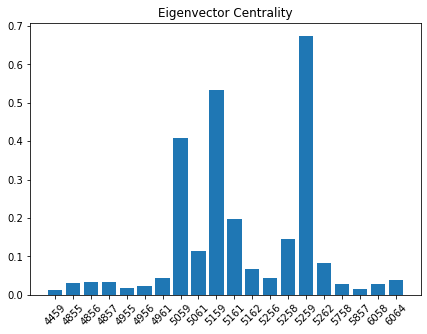

In [43]:
plt.figure(figsize=(7,5))
plt.title('Eigenvector Centrality')
plt.bar(range(len(eigenvector_centrality)), eigenvector_centrality.values())
plt.xticks(range(len(eigenvector_centrality)), [int(x) for x in eigenvector_centrality.keys()], rotation=45)
plt.savefig(f'../plots/eigenvector_centrality_{city}_week{week}.png')